In [1]:
import sys
sys.path.append('../')

import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np
import cv2
from torchvision import models, transforms

from configs import b16_config
from model import ViT
from modules import TransformerEncoder
from experiment_utils import load_model

In [2]:
model_config = b16_config()
model_config.update({'num_classes':10})
model = load_model(ViT, 'pretrained/cifar10_224.pth', model_config)

In [3]:
block_weights = []
block_layers = []
model_children = list(model.children())

In [26]:
all_block = []
for model_child in list(model.children()):
    if type(model_child) != torch.nn.modules.container.ModuleList:
        if isinstance(model_child, TransformerEncoder):
            for i in range(12):
                all_block.append(model_child.blocks[i])
        else:
            all_block.append(model_child)

In [37]:
list(all_block[2].modules())[-1]

LayerNorm((768,), eps=1e-05, elementwise_affine=True)

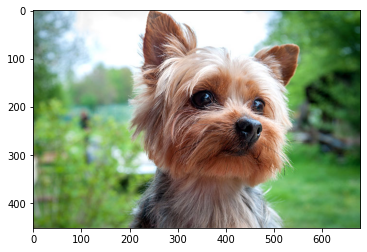

In [19]:
img = cv2.imread('data/images/dog.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

transform = transforms.Compose([
    transforms.ToPILImage(),
    transforms.Resize((224, 224)),
    transforms.ToTensor()
])

img = np.array(img)
img = transform(img)
img = img.unsqueeze(0)

In [30]:
results = []
print(img.shape)
results = [all_block[0](img)]
# print(results.shape)
for i in range(2, len(all_block) - 3):
    results.append(all_block[i](results[-1]))
    
outputs = results

torch.Size([1, 3, 224, 224])


RuntimeError: Given normalized_shape=[768], expected input with shape [*, 768], but got input of size[1, 768, 196]

In [ ]:
all_layer_num = 1
for num_layer in range(all_layer_num):
    plt.figure(figsize=(30, 30))
    layer_viz = outputs[num_layer]
    layer_viz = layer_viz.data
    layer_viz = layer_viz.squeeze(0).transpose(0, 1)
    layer_viz = layer_viz.reshape(768, 14, 14)
    
    for i, filter in enumerate(layer_viz):
        if i == 36:
            break
        plt.subplot(6, 6, i+1)
        plt.imshow(filter, cmap='gray')
        plt.axis('off')
    print(f'Saving layer {num_layer} feature maps')
    plt.savefig(f'data/outputs/vit/layer_{num_layer}.png')
    plt.close()

Saving layer 0 feature maps
